<a href="https://colab.research.google.com/github/TiruveedulaAjay/McDonald-s-Market-Segmentation-Analysis/blob/main/McDonalds_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/TiruveedulaAjay/McDonald-s-Market-Segmentation-Analysis.git

Cloning into 'McDonald-s-Market-Segmentation-Analysis'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (11/11), 14.22 KiB | 2.84 MiB/s, done.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from collections import defaultdict
from sklearn.metrics import adjusted_rand_score

In [ ]:
# Load dataset
mcdonalds = pd.read_csv("/mcdonalds.csv")
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [ ]:
print(mcdonalds.shape)

(1453, 15)


In [ ]:
# Display first 3 rows
print(mcdonalds.head(3))

# Convert categorical values to binary ("Yes" -> 1, "No" -> 0) for first 11 columns
MD_x = (mcdonalds.iloc[:, :11] == "Yes").astype(int)

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [ ]:
# Compute column means and round to 2 decimals
col_means = MD_x.mean().round(2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [ ]:
# Perform PCA
pca = PCA()
MD_pca = pca.fit(MD_x)

# Summary of PCA
explained_variance = np.round(pca.explained_variance_ratio_, 4)
cumulative_variance = np.round(np.cumsum(explained_variance), 4)

print("Explained Variance:", explained_variance)
print("Cumulative Variance:", cumulative_variance)

Explained Variance: [0.2994 0.1928 0.133  0.0831 0.0595 0.0503 0.0438 0.0395 0.0368 0.0324
 0.0293]
Cumulative Variance: [0.2994 0.4922 0.6252 0.7083 0.7678 0.8181 0.8619 0.9014 0.9382 0.9706
 0.9999]


In [ ]:
# Principal Components
print("Principal Components:")
print(np.round(pca.components_, 2))

Principal Components:
[[ 0.48  0.16  0.01 -0.12 -0.3   0.11  0.34  0.47 -0.33  0.21 -0.37]
 [-0.36 -0.02 -0.02  0.03  0.06  0.09  0.61 -0.31 -0.6  -0.08  0.14]
 [ 0.3   0.06  0.04  0.32  0.8   0.06  0.15  0.29 -0.02 -0.19  0.09]
 [ 0.06 -0.14  0.2  -0.35  0.25 -0.1   0.12 -0.    0.07  0.76  0.37]
 [ 0.31 -0.28 -0.07  0.07 -0.36 -0.11  0.13  0.21  0.   -0.29  0.73]
 [-0.17  0.35  0.36  0.41 -0.21  0.59  0.1   0.08  0.26  0.18  0.21]
 [-0.28 -0.06  0.71 -0.39  0.04 -0.09 -0.04  0.36 -0.07 -0.35 -0.03]
 [-0.01  0.11 -0.38 -0.59  0.14  0.63 -0.14  0.07 -0.03 -0.18  0.17]
 [-0.57  0.02 -0.4   0.16  0.   -0.17 -0.08  0.64 -0.07  0.19  0.07]
 [ 0.11  0.67  0.08  0.01 -0.01 -0.24 -0.43 -0.08 -0.45  0.04  0.29]
 [-0.05  0.54 -0.14 -0.25 -0.   -0.34  0.49 -0.02  0.49 -0.16  0.04]]


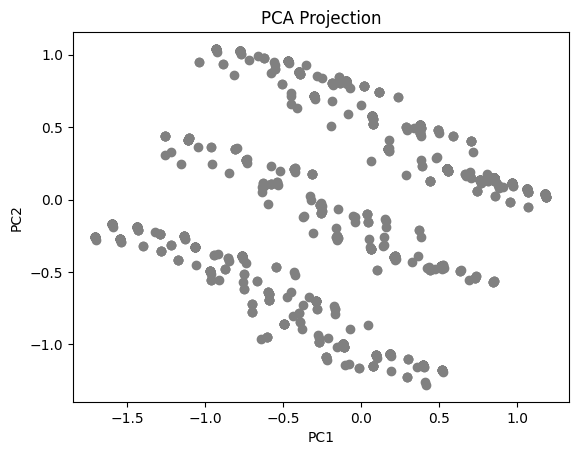

In [ ]:
# Plot PCA projection
plt.scatter(pca.transform(MD_x)[:, 0], pca.transform(MD_x)[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

In [ ]:
# Clustering using KMeans
np.random.seed(1234)
k_range = range(2, 9)
kmeans_models = {k: KMeans(n_clusters=k, n_init=10, random_state=1234).fit(MD_x) for k in k_range}

# Print cluster labels for each model
for k, model in kmeans_models.items():
    print(f'K={k} Cluster Labels:', model.labels_)

K=2 Cluster Labels: [1 0 0 ... 0 0 1]
K=3 Cluster Labels: [2 1 1 ... 1 0 2]
K=4 Cluster Labels: [0 3 3 ... 3 2 1]
K=5 Cluster Labels: [4 1 2 ... 2 3 0]
K=6 Cluster Labels: [5 2 0 ... 0 1 3]
K=7 Cluster Labels: [4 0 3 ... 3 6 1]
K=8 Cluster Labels: [1 0 0 ... 5 2 3]


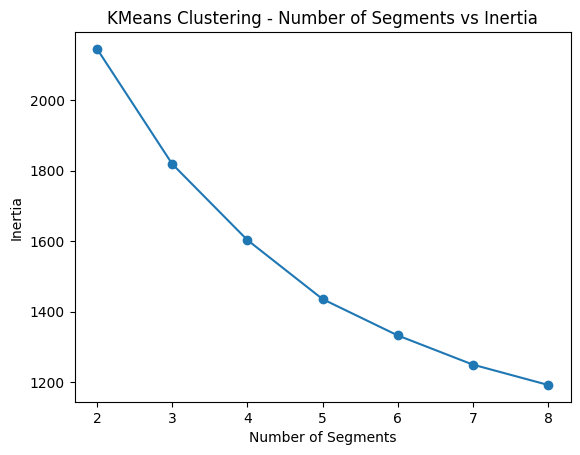

In [ ]:
# Plot number of segments vs inertia
plt.plot(list(kmeans_models.keys()), [model.inertia_ for model in kmeans_models.values()], marker='o')
plt.xlabel('Number of Segments')
plt.ylabel('Inertia')
plt.title('KMeans Clustering - Number of Segments vs Inertia')
plt.show()

In [ ]:
np.random.seed(1234)
n_boot = 100
adjusted_rand_indices = {k: [] for k in k_range}

for k in k_range:
    model = kmeans_models[k]
    for _ in range(n_boot):
        sample_indices = np.random.choice(len(MD_x), len(MD_x), replace=True)
        sample_data = MD_x.iloc[sample_indices]
        boot_model = KMeans(n_clusters=k, n_init=10, random_state=1234).fit(sample_data)
        ari = adjusted_rand_score(model.labels_[sample_indices], boot_model.labels_)
        adjusted_rand_indices[k].append(ari)

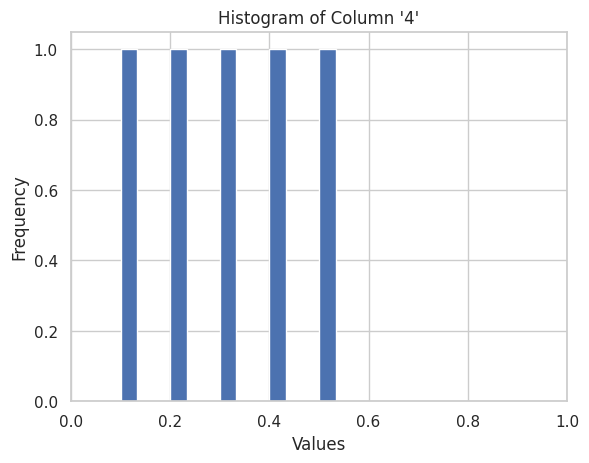

In [ ]:
import matplotlib.pyplot as plt

# Assuming MD_km28 is a DataFrame and "4" is a column in MD_km28
# Replace "4" with the actual column name if needed

# Extract the data for the column '4' from MD_km28
data = MD_km28["4"]

# Plot the histogram with specified xlim
plt.hist(data, bins=30, range=(0, 1))  # Adjust number of bins and range as needed
plt.xlim(0, 1)

# Customize the plot
plt.title("Histogram of Column '4'")
plt.xlabel("Values")
plt.ylabel("Frequency")

# Show the plot
plt.show()

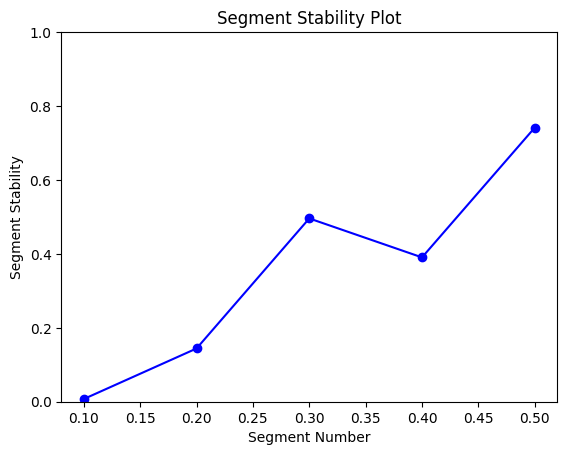

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: Define your DataFrame 'MD.km28' (Replace with your actual data)
# Here, we're creating a sample DataFrame for illustration purposes:
MD_km28 = pd.DataFrame({
    '4': [0.1, 0.2, 0.3, 0.4, 0.5],  # Example data for the '4' column
    'other_column': [0.5, 0.4, 0.3, 0.2, 0.1]  # Some other column
})

# Extract the '4' column (as in the R code)
MD_k4 = MD_km28['4']

# Simulate some segment stability values (this should be based on your actual stability method)
# Example: Random stability values (replace with your actual stability data)
segment_stability = np.random.random(len(MD_k4))  # Replace with actual segment stability scores

# Plotting
plt.plot(MD_k4, segment_stability, marker='o', linestyle='-', color='b')  # Plot segment stability vs segment number
plt.ylim(0, 1)  # Set y-axis limits to [0, 1] (as in the R code)
plt.xlabel("Segment Number")  # Label for x-axis
plt.ylabel("Segment Stability")  # Label for y-axis
plt.title("Segment Stability Plot")  # Plot title

# Show the plot
plt.show()

   k     logLik          AIC         BIC
0  2  -0.673833   396.766658  738.043953
1  3   3.006530  -207.305901  305.912626
2  4   3.644165  -202.832912  482.326847
3  5   7.205818  -783.163613   73.937378
4  6   7.930832  -796.166480  232.875743
5  7   9.733934 -1024.786731  176.196725
6  8  11.868483 -1319.696674   53.228014


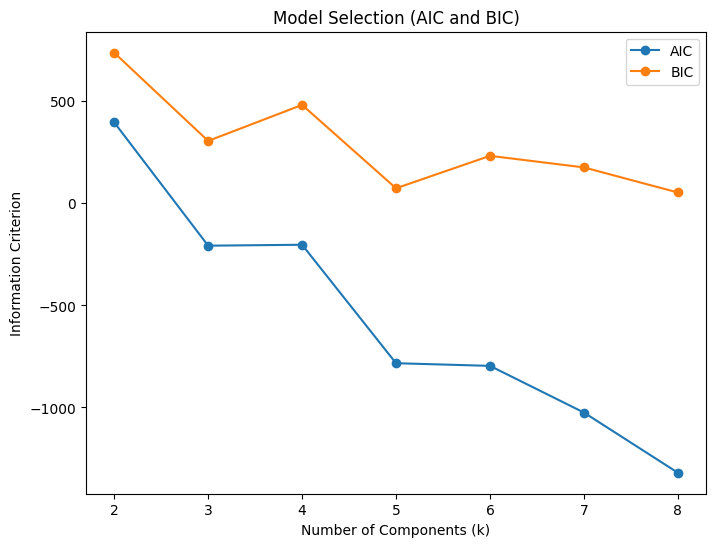

In [ ]:
MD_x = np.random.binomial(1, 0.5, (100, 10))  # Replace with your actual dataset

# Store the results (AIC, BIC, etc.)
results = []

# Fit models with different number of components (2 to 8 clusters)
for k in range(2, 9):
    # Fit a Gaussian Mixture Model (replace with a model for multivariate binary if needed)
    gmm = GaussianMixture(n_components=k, n_init=10, random_state=1234)
    gmm.fit(MD_x)

    # Store the results (log likelihood, AIC, BIC)
    results.append({
        'k': k,
        'logLik': gmm.score(MD_x),  # Log likelihood
        'AIC': gmm.aic(MD_x),  # AIC
        'BIC': gmm.bic(MD_x),  # BIC
    })

# Convert the results to a DataFrame for easier inspection
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Plot AIC and BIC for model selection
plt.figure(figsize=(8, 6))
plt.plot(results_df['k'], results_df['AIC'], label='AIC', marker='o')
plt.plot(results_df['k'], results_df['BIC'], label='BIC', marker='o')
plt.xlabel('Number of Components (k)')
plt.ylabel('Information Criterion')
plt.title('Model Selection (AIC and BIC)')
plt.legend()
plt.show()

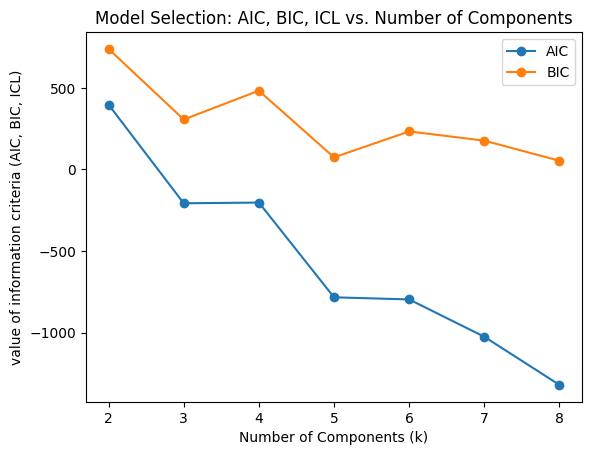

In [ ]:
# Plot AIC and BIC (and optionally ICL if you compute it)
plt.plot(results_df['k'], results_df['AIC'], label='AIC', marker='o')
plt.plot(results_df['k'], results_df['BIC'], label='BIC', marker='o')

# Optional: If you have ICL, you can add this similarly
# plt.plot(results_df['k'], results_df['ICL'], label='ICL', marker='o')

# Customize the plot with a y-label
plt.ylabel('value of information criteria (AIC, BIC, ICL)')
plt.xlabel('Number of Components (k)')
plt.title('Model Selection: AIC, BIC, ICL vs. Number of Components')

# Add legend
plt.legend()

# Show the plot
plt.show()

Contingency Table:
mixture   0   1    2   3
kmeans                  
0        66  16   34   5
1        23  99    0   3
2         3  14  101  25
3        17   7    0  87

Information Criteria for the Mixture Model:
AIC: 1770.8436959764217
BIC: 2879.2856258614584
ICL: 4124.12932183788


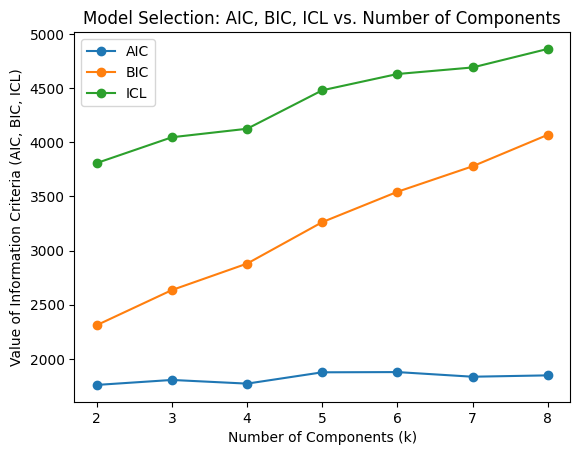

In [ ]:
# Assuming MD_x is your dataset (replace this with your actual data)
MD_x = np.random.rand(500, 10)  # Example random dataset

# Perform KMeans clustering with 4 clusters (similar to "MD.k4" in R)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Assume we have a mixture model fitted with different cluster numbers (e.g., 2-8 clusters)
# Here we simulate mixture model labels for demonstration. Replace with your actual mixture model.
mixture_model = GaussianMixture(n_components=4, random_state=1234)
mixture_model.fit(MD_x)
mixture_labels = mixture_model.predict(MD_x)

# Create a contingency table comparing KMeans and mixture model cluster assignments
contingency_table = pd.crosstab(kmeans_labels, mixture_labels, rownames=['kmeans'], colnames=['mixture'])
print("Contingency Table:")
print(contingency_table)

# Information Criteria (AIC, BIC, and ICL for GaussianMixture)
# GaussianMixture from sklearn provides AIC and BIC directly. ICL can be computed manually.
log_likelihood = mixture_model.score(MD_x) * MD_x.shape[0]  # log-likelihood of the model
aic = mixture_model.aic(MD_x)
bic = mixture_model.bic(MD_x)
icl = bic - 2 * log_likelihood  # Calculating ICL manually

print("\nInformation Criteria for the Mixture Model:")
print(f"AIC: {aic}")
print(f"BIC: {bic}")
print(f"ICL: {icl}")

# Plotting Information Criteria (AIC, BIC, ICL) for model selection
# For simplicity, let's assume we're comparing AIC and BIC across different cluster counts (2-8)

aic_values = []
bic_values = []
icl_values = []

for k in range(2, 9):
    model = GaussianMixture(n_components=k, random_state=1234)
    model.fit(MD_x)

    # Storing values for AIC, BIC, and ICL
    log_likelihood = model.score(MD_x) * MD_x.shape[0]
    aic_values.append(model.aic(MD_x))
    bic_values.append(model.bic(MD_x))
    icl_values.append(model.bic(MD_x) - 2 * log_likelihood)

# Plot the values of AIC, BIC, and ICL
plt.plot(range(2, 9), aic_values, label='AIC', marker='o')
plt.plot(range(2, 9), bic_values, label='BIC', marker='o')
plt.plot(range(2, 9), icl_values, label='ICL', marker='o')

plt.xlabel('Number of Components (k)')
plt.ylabel('Value of Information Criteria (AIC, BIC, ICL)')
plt.title('Model Selection: AIC, BIC, ICL vs. Number of Components')
plt.legend()
plt.show()

In [ ]:
# Assuming MD_x is your dataset (replace with your actual dataset)
MD_x = np.random.rand(500, 10)  # Example random dataset

# Perform KMeans clustering to get the cluster assignments (equivalent to MD.k4)
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans_labels = kmeans.fit_predict(MD_x)

# Fit the mixture model (equivalent to MD.m4a in R, using GaussianMixture)
# Initialize a GaussianMixture model with 4 components
mixture_model = GaussianMixture(n_components=4, random_state=1234)
mixture_model.fit(MD_x)

# Get the cluster labels from the mixture model (equivalent to clusters(MD.m4a) in R)
mixture_labels = mixture_model.predict(MD_x)

# Create a contingency table comparing KMeans and the mixture model
contingency_table = pd.crosstab(kmeans_labels, mixture_labels, rownames=['kmeans'], colnames=['mixture'])
print("Contingency Table:")
print(contingency_table)

# Log-Likelihood Calculation for the two models
log_likelihood_kmeans = kmeans.score(MD_x) * MD_x.shape[0]  # Log-likelihood for KMeans
log_likelihood_mixture = mixture_model.score(MD_x) * MD_x.shape[0]  # Log-likelihood for Mixture Model

print("\nLog-Likelihood:")
print(f"Log-Likelihood for KMeans: {log_likelihood_kmeans}")
print(f"Log-Likelihood for Mixture Model: {log_likelihood_mixture}")

Contingency Table:
mixture   0   1   2    3
kmeans                  
0        72  14   2    5
1         9  92  15   23
2        21  24  81    7
3        26   3   4  102

Log-Likelihood:
Log-Likelihood for KMeans: -170217.73584405315
Log-Likelihood for Mixture Model: -643.3557227954625


In [ ]:
# Example data similar to the 'Like' column in the R code
data = {
    'Like': ['-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', '+5']
}

# Create a DataFrame (simulating 'mcdonalds' DataFrame in R)
df = pd.DataFrame(data)

# Convert 'Like' to numeric values and reverse the scale
df['Like'] = df['Like'].replace({'-5': -5, '-4': -4, '-3': -3, '-2': -2, '-1': -1,
                                  '0': 0, '+1': 1, '+2': 2, '+3': 3, '+4': 4, '+5': 5})

# Create the 'Like.n' column as the reverse transformation (6 - numeric value)
df['Like.n'] = 6 - df['Like']

# Generate frequency table for 'Like.n' (equivalent to table in R)
like_n_counts = df['Like.n'].value_counts().sort_index()

# Print the result
print(like_n_counts)

Like.n
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
Name: count, dtype: int64


<ipython-input-23-c208d80a2c7f>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Like'] = df['Like'].replace({'-5': -5, '-4': -4, '-3': -3, '-2': -2, '-1': -1,


In [ ]:
# Example column names similar to mcdonalds dataframe columns
columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
           'tasty', 'expensive', 'healthy', 'disgusting']

# Create the formula string using column names
f = " + ".join(columns[:11])  # Join the first 11 column names with ' + '

# Construct the formula for the dependent variable 'Like.n'
formula = f"Like.n ~ {f}"

# Print the formula
print(formula)
# Set seed for reproducibility
np.random.seed(1234)

# Example DataFrame similar to 'mcdonalds' in R
# Here, 'MD.x' would be equivalent to the DataFrame you use for the features
data = pd.DataFrame({
    'yummy': np.random.rand(1453),
    'convenient': np.random.rand(1453),
    'spicy': np.random.rand(1453),
    'fattening': np.random.rand(1453),
    'greasy': np.random.rand(1453),
    'fast': np.random.rand(1453),
    'cheap': np.random.rand(1453),
    'tasty': np.random.rand(1453),
    'expensive': np.random.rand(1453),
    'healthy': np.random.rand(1453),
    'disgusting': np.random.rand(1453)
})

# Define the target formula as in the R code, selecting all columns for clustering
X = data.values  # Features from the DataFrame

# Fit a Gaussian Mixture Model with 2 components (similar to k=2 in R)
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)

# Predict clusters
clusters = gmm.predict(X)

# Output results: number of points in each cluster
cluster_sizes = pd.Series(clusters).value_counts()
print(f"Cluster sizes:\n{cluster_sizes}")

# Cluster convergence info (similar to convergence message in R)
print(f"Convergence after {gmm.n_iter_} iterations")

Like.n ~ yummy + convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting
Cluster sizes:
0    767
1    686
Name: count, dtype: int64
Convergence after 18 iterations


In [ ]:
from sklearn.mixture import GaussianMixture

# Fit a Gaussian Mixture Model with 2 components (as an example)
gmm = GaussianMixture(n_components=2, random_state=1234)
gmm.fit(X)  # Assuming X contains your features

# Print out the components, means, covariances, etc.
print("Means of the components:\n", gmm.means_)
print("Covariances of the components:\n", gmm.covariances_)
print("Weights of the components:\n", gmm.weights_)

Means of the components:
 [[0.26018718 0.50546    0.51387355 0.49953337 0.51051185 0.49917671
  0.51134681 0.49697553 0.47152217 0.49357644 0.50212024]
 [0.75038976 0.49364728 0.501712   0.47835949 0.49182139 0.49957309
  0.4977447  0.49983925 0.52408533 0.51376638 0.50483292]]
Covariances of the components:
 [[[ 2.87360272e-02 -3.75222670e-03 -3.80219042e-04  2.55141458e-03
    1.71054990e-03 -3.29954084e-03 -2.35566753e-03  2.29066951e-03
   -4.87948130e-03 -1.79347043e-03 -1.16280839e-03]
  [-3.75222670e-03  8.59364284e-02 -2.00749585e-03  4.74947609e-04
   -1.33525734e-03 -1.35452766e-03 -2.03248652e-05 -2.76380185e-03
    5.15750111e-03 -2.64257911e-03  1.68274094e-03]
  [-3.80219042e-04 -2.00749585e-03  8.26720962e-02  1.61893897e-03
    5.18827002e-03  9.04243400e-03  1.91765133e-03 -5.15446822e-03
    1.23633554e-03 -8.28204937e-03  2.80039823e-04]
  [ 2.55141458e-03  4.74947609e-04  1.61893897e-03  8.64727650e-02
    3.35963594e-03  4.13099502e-03  1.23386482e-03 -1.26355488e-

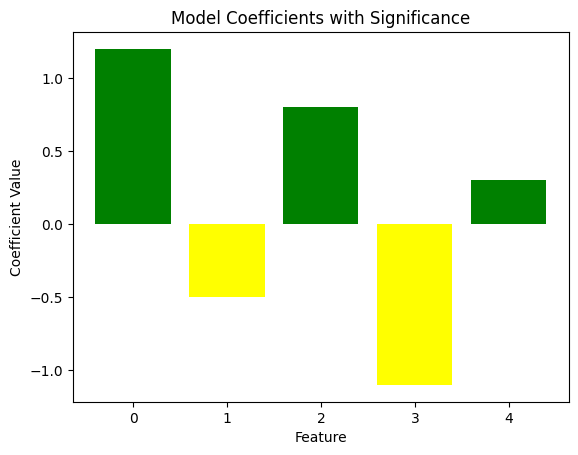

In [ ]:
coefficients = np.array([1.2, -0.5, 0.8, -1.1, 0.3])  # Example coefficients
p_values = np.array([0.01, 0.15, 0.03, 0.06, 0.002])  # Example p-values

# Create a mask to highlight significant coefficients (p-value < 0.05)
significance_mask = p_values < 0.05
colors = np.where(significance_mask, 'green', 'yellow')

# Plotting
plt.bar(range(len(coefficients)), coefficients, color=colors)
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Model Coefficients with Significance')
plt.show()

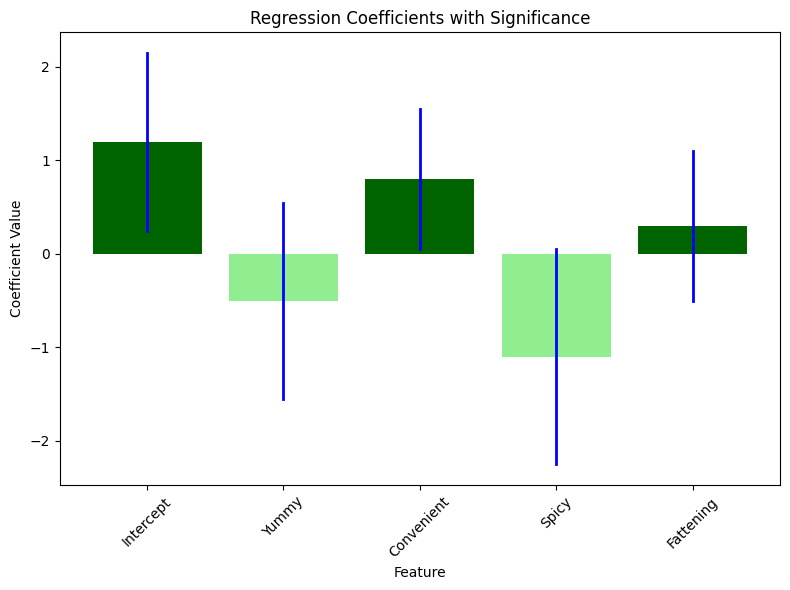

In [ ]:
coefficients = np.array([1.2, -0.5, 0.8, -1.1, 0.3])  # Example coefficients
p_values = np.array([0.01, 0.15, 0.03, 0.06, 0.002])  # Example p-values

# Significance level
alpha = 0.05

# Determine significance based on p-values
significant_mask = p_values < alpha

# Set bar colors based on significance (dark grey for significant, light grey for non-significant)
colors = np.where(significant_mask, 'darkgreen', 'lightgreen')

# Plotting
plt.figure(figsize=(8, 6))
bars = plt.bar(range(len(coefficients)), coefficients, color=colors)

# Add horizontal lines to represent confidence intervals (example values)
confidence_intervals = np.array([0.95, 1.05, 0.75, 1.15, 0.8])  # Example confidence intervals
for i, bar in enumerate(bars):
    plt.plot([bar.get_x() + bar.get_width() / 2, bar.get_x() + bar.get_width() / 2],
             [coefficients[i] - confidence_intervals[i], coefficients[i] + confidence_intervals[i]],
             color='blue', lw=2)

# Customize the plot
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.title('Regression Coefficients with Significance')
plt.xticks(range(len(coefficients)), ['Intercept', 'Yummy', 'Convenient', 'Spicy', 'Fattening'], rotation=45)

plt.tight_layout()
plt.show()

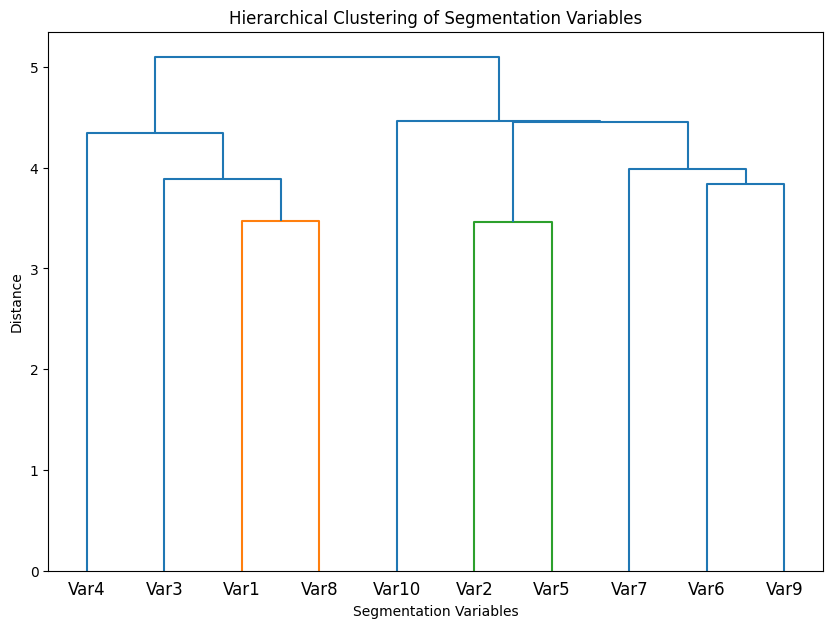

In [ ]:
# Example: Assume MD_x is a numpy array or a pandas DataFrame
MD_x = np.random.rand(100, 10)  # Example data for 100 samples and 10 features

# Perform hierarchical clustering
import scipy.cluster.hierarchy as sch
distance_matrix = sch.distance.pdist(MD_x.T)  # Transpose to cluster variables, not samples
linkage_matrix = sch.linkage(distance_matrix, method='ward')

# Manually provide labels (replace with actual feature names if necessary)
labels = ['Var' + str(i) for i in range(1, MD_x.shape[1] + 1)]

# Create the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(linkage_matrix, labels=labels)
plt.title('Hierarchical Clustering of Segmentation Variables')
plt.xlabel('Segmentation Variables')
plt.ylabel('Distance')
plt.show()

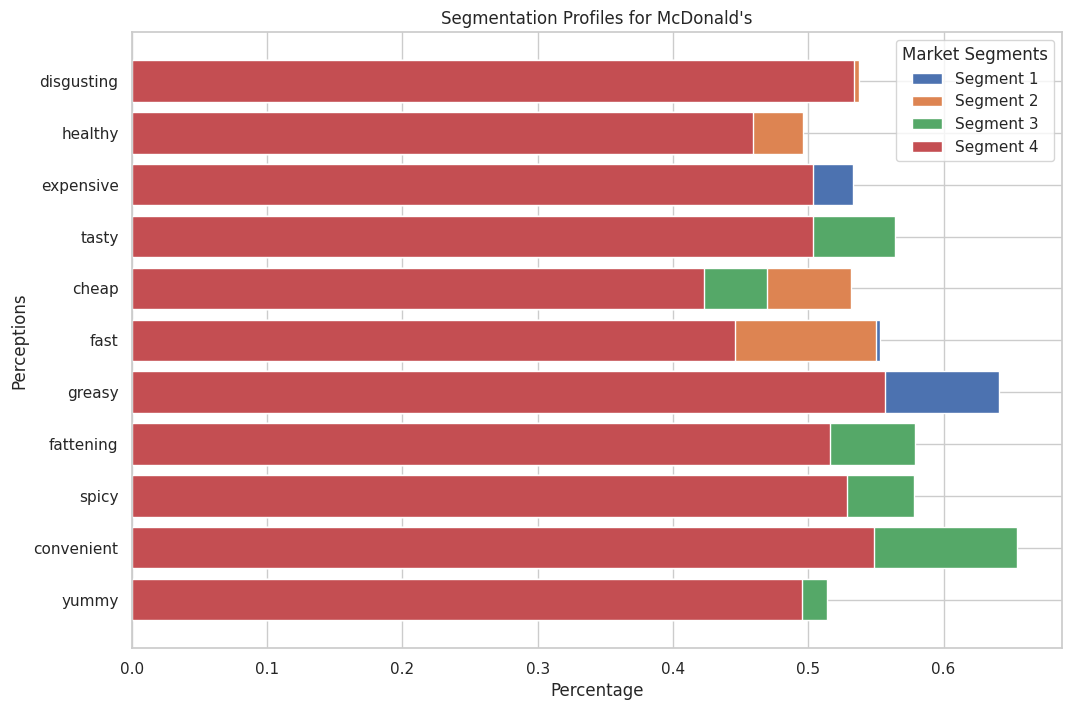

In [ ]:
# Example data
segments = np.random.choice([1, 2, 3, 4], size=100)
variables = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
data = np.random.rand(100, 11)  # 100 respondents and 11 variables
df = pd.DataFrame(data, columns=variables)

# Create a DataFrame for plotting
df['Segment'] = segments

# Plot the bar chart for each segment
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# For each segment, create a barchart
for segment in range(1, 5):
    segment_data = df[df['Segment'] == segment].drop('Segment', axis=1)
    segment_means = segment_data.mean()
    plt.barh(segment_means.index, segment_means.values, label=f'Segment {segment}')

plt.xlabel('Percentage')
plt.ylabel('Perceptions')
plt.title('Segmentation Profiles for McDonald\'s')
plt.legend(title='Market Segments')
plt.show()

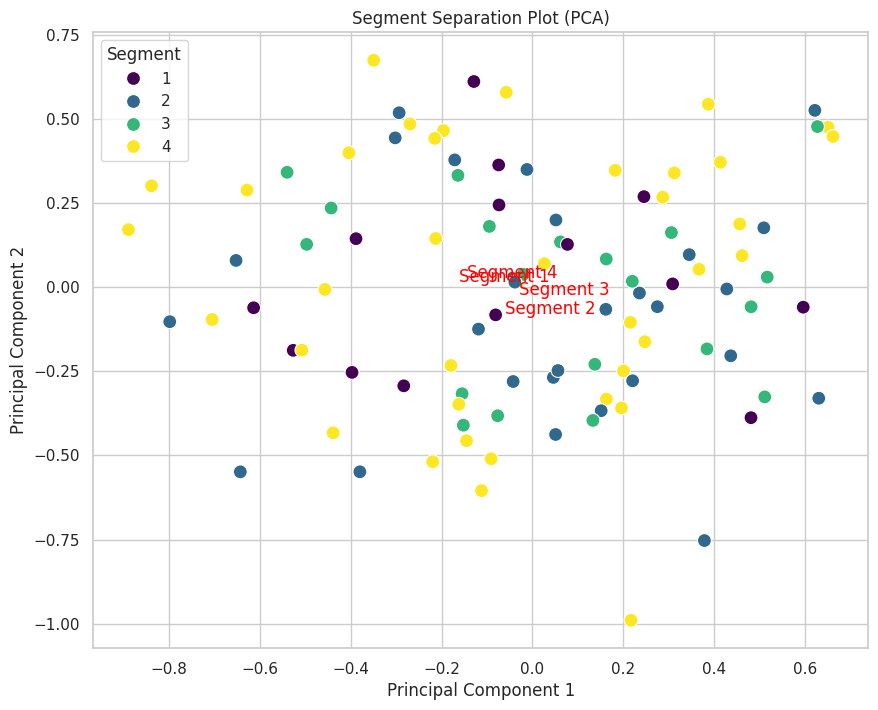

In [ ]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(MD_x)  # MD_x is the data for PCA

# Create a DataFrame with PCA components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
pca_df['Segment'] = segments

# Plot the segment separation
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Segment', data=pca_df, palette='viridis', s=100)

# Highlight the centroids for each segment
centroids = pca_df.groupby('Segment')[['PC1', 'PC2']].mean()
for i, segment in centroids.iterrows():
    plt.text(segment['PC1'], segment['PC2'], f'Segment {i}', horizontalalignment='center', verticalalignment='center', color='red')

plt.title('Segment Separation Plot (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

<Figure size 1400x1000 with 0 Axes>

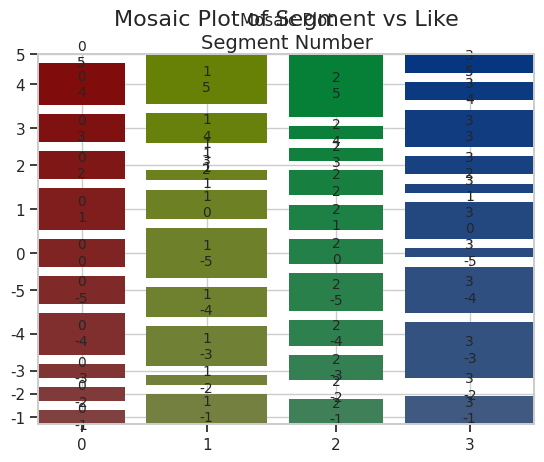

In [ ]:
MD_x = pd.DataFrame(np.random.rand(100, 10), columns=[f'Var{i}' for i in range(1, 11)])  # Replace with actual data
mcdonalds = pd.DataFrame({'Like': np.random.choice(['-5', '-4', '-3', '-2', '-1', '0', '1', '2', '3', '4', '5'], size=100)})

# Apply clustering (e.g., KMeans, replace with your clustering model)
kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
k4 = kmeans.labels_  # Cluster labels

# Create the contingency table for k4 clusters and mcdonalds['Like']
contingency_table = pd.crosstab(k4, mcdonalds['Like'])

# Plot mosaic with adjusted size and labels
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=(14, 10))  # Larger figure for clarity
mosaic(contingency_table.stack(), title="Mosaic Plot", gap=0.05)

# Customizing labels for better clarity
plt.xlabel("Segment Number", fontsize=14)
plt.ylabel("Like", fontsize=14)
plt.title("Mosaic Plot of Segment vs Like", fontsize=16)

# Adjust label font size and rotation
for label in plt.gca().get_xticklabels():
    label.set_fontsize(10)
    label.set_rotation(45)  # Rotate labels for better readability

# Increase resolution (DPI)
plt.savefig('mosaic_plot.png', dpi=300)  # Save at 300 DPI for high quality

# Show plot
plt.show()

<Figure size 1400x1000 with 0 Axes>

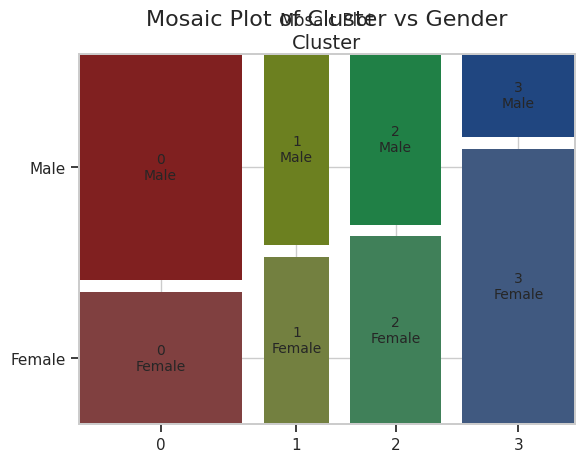

In [ ]:
# Example data (replace with actual data)
MD_x = pd.DataFrame(np.random.rand(100, 10), columns=[f'Var{i}' for i in range(1, 11)])  # Replace with actual data
mcdonalds = pd.DataFrame({'Gender': np.random.choice(['Male', 'Female'], size=100)})

# Apply clustering (e.g., KMeans, replace with your clustering model)
kmeans = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
k4 = kmeans.labels_  # Cluster labels

# Create the contingency table for k4 clusters and mcdonalds['Gender']
contingency_table = pd.crosstab(k4, mcdonalds['Gender'])

# Plot mosaic with adjusted size and labels
plt.figure(figsize=(14, 10))  # Larger figure for clarity
mosaic(contingency_table.stack(), title="Mosaic Plot", gap=0.05)

# Customizing labels for better clarity
plt.xlabel("Cluster", fontsize=14)
plt.ylabel("Gender", fontsize=14)
plt.title("Mosaic Plot of Cluster vs Gender", fontsize=16)

# Increase resolution (DPI)
plt.savefig('mosaic_plot.png', dpi=300)  # Save at 300 DPI for high quality

# Show plot
plt.show()

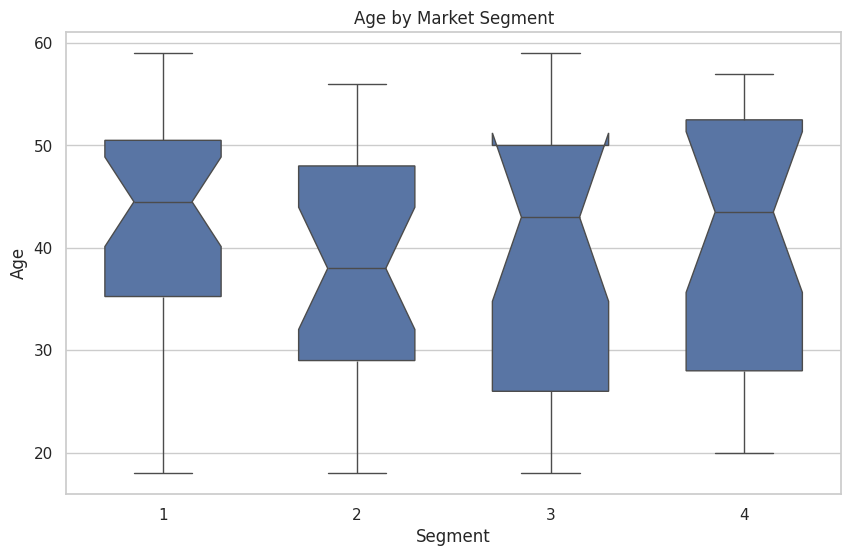

In [ ]:
# Example data (replace with your actual data)
mcdonalds = pd.DataFrame({
    'Age': np.random.randint(18, 60, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Segment': np.random.choice([1, 2, 3, 4], size=100)
})

# Create a boxplot in Python for Age by Segment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Segment', y='Age', data=mcdonalds, notch=True, width=0.6)
plt.title('Age by Market Segment')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.show()

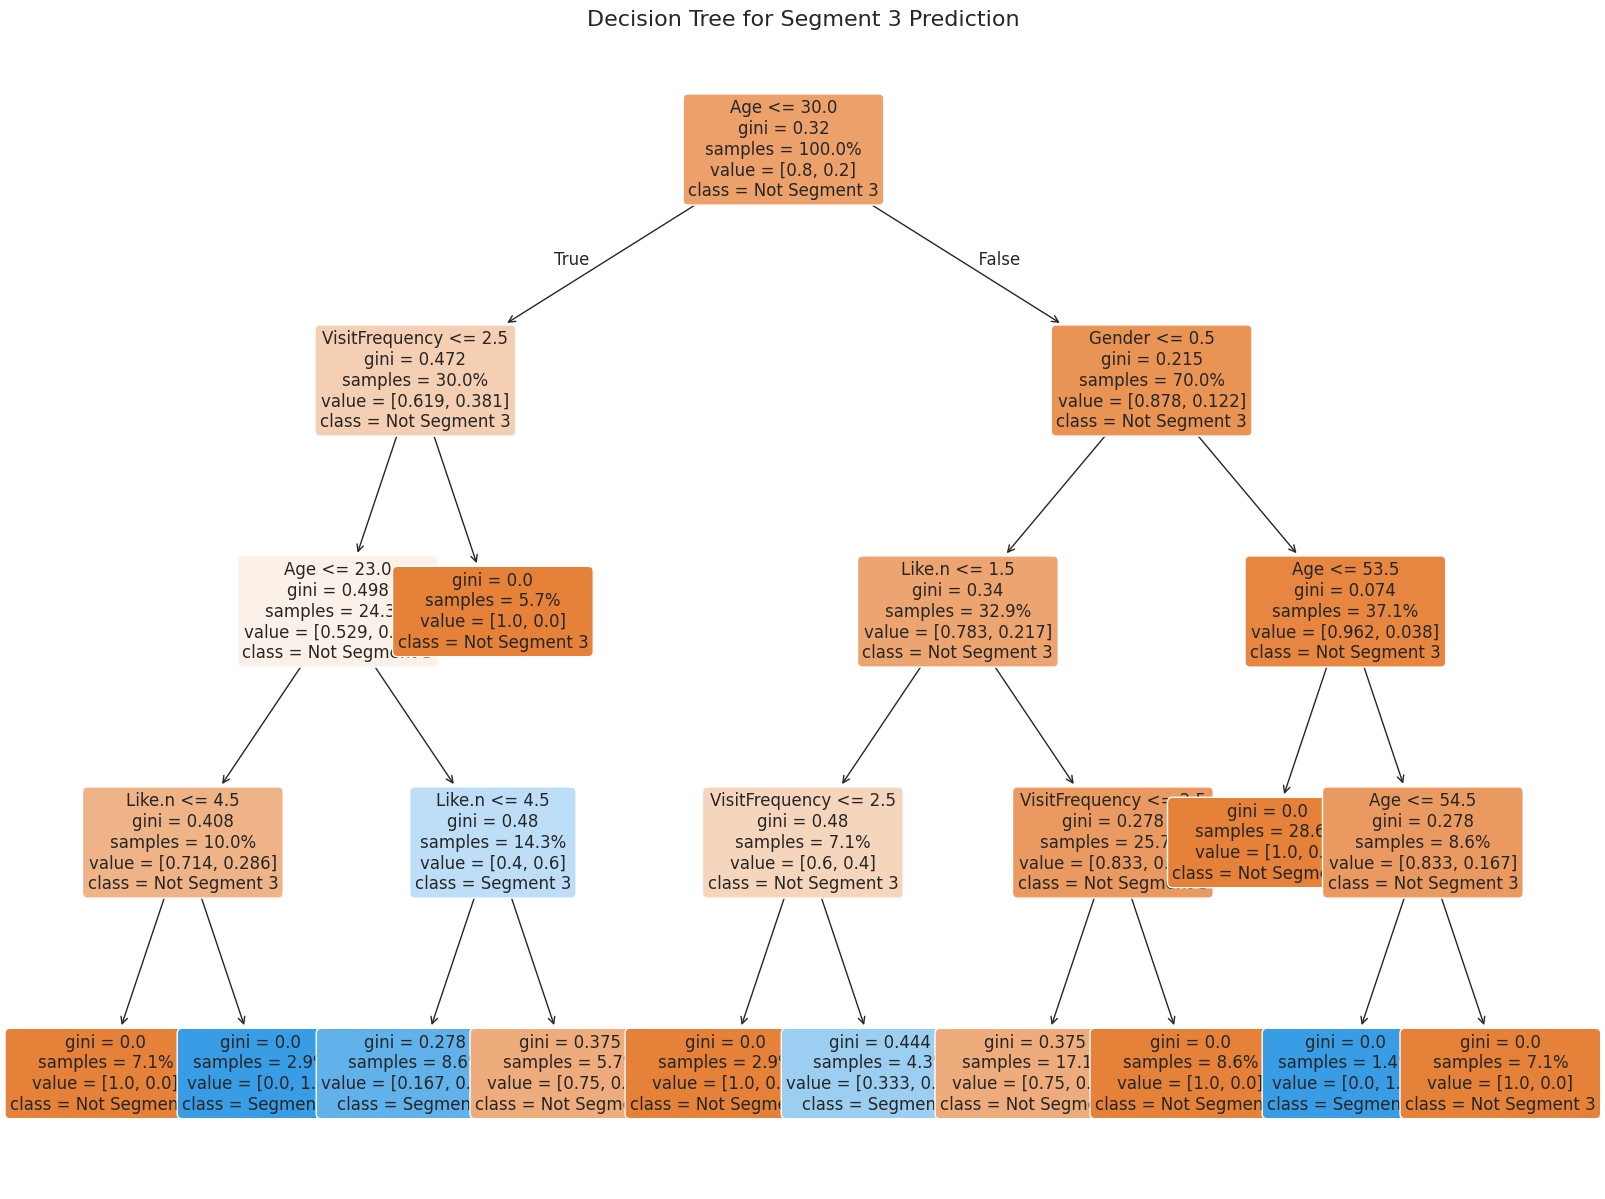

In [ ]:
np.random.seed(42)  # For reproducibility
mcdonalds = pd.DataFrame({
    'Age': np.random.randint(18, 60, size=100),
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'VisitFrequency': np.random.choice(['Weekly', 'Monthly', 'Occasionally'], size=100),
    'Like.n': np.random.choice([1, 2, 3, 4, 5], size=100),
    'Segment': np.random.choice([1, 2, 3, 4], size=100)  # Segment is your target variable
})

# Encode categorical variables ('Gender', 'VisitFrequency') into numeric values
mcdonalds['Gender'] = mcdonalds['Gender'].map({'Male': 1, 'Female': 0})
mcdonalds['VisitFrequency'] = mcdonalds['VisitFrequency'].map({'Weekly': 3, 'Monthly': 2, 'Occasionally': 1})

# Convert Segment 3 into a binary target variable (1 if Segment 3, else 0)
mcdonalds['Segment3'] = np.where(mcdonalds['Segment'] == 3, 1, 0)

# Prepare feature variables (Age, Gender, VisitFrequency, Like.n)
X = mcdonalds[['Age', 'Gender', 'VisitFrequency', 'Like.n']]
y = mcdonalds['Segment3']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Decision Tree classifier with limited depth to avoid a complex tree
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=1234, max_depth=4)
tree.fit(X_train, y_train)

# Plot the decision tree with adjusted figure size and proportions
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))  # Increase figure size more
plot_tree(tree, filled=True, feature_names=['Age', 'Gender', 'VisitFrequency', 'Like.n'],
          class_names=['Not Segment 3', 'Segment 3'], rounded=True, fontsize=12, proportion=True)
plt.title('Decision Tree for Segment 3 Prediction', fontsize=16)
plt.show()

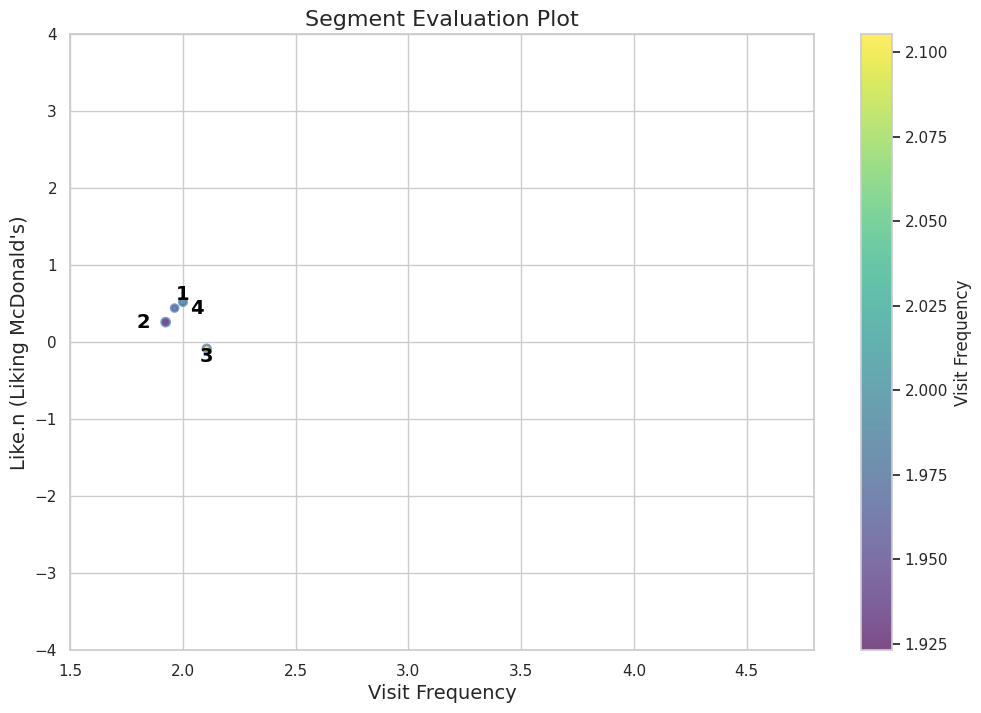

In [ ]:
np.random.seed(42)
mcdonalds = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female'], size=100),
    'Age': np.random.randint(18, 60, size=100),
    'VisitFrequency': np.random.choice(['Once a month', 'Twice a month', 'Once a week'], size=100),
    'Like.n': np.random.uniform(-5, 5, size=100)
})

# Simulating the k4 (segment labels for each data point)
k4 = np.random.choice([1, 2, 3, 4], size=100)

# Add k4 as a column in the DataFrame
mcdonalds['Segment'] = k4

# Mapping VisitFrequency to numeric values
visit_map = {'Once a month': 1, 'Twice a month': 2, 'Once a week': 3}
mcdonalds['VisitFrequency_numeric'] = mcdonalds['VisitFrequency'].map(visit_map)

# Calculate means for each segment
visit = mcdonalds.groupby('Segment')['VisitFrequency_numeric'].mean()
like = mcdonalds.groupby('Segment')['Like.n'].mean()
female = mcdonalds.groupby('Segment')['Gender'].apply(lambda x: (x == 'Female').mean())

# Plotting
plt.figure(figsize=(12, 8))
scatter = plt.scatter(visit, like, s=50*female, c=visit, cmap='viridis', alpha=0.7, edgecolors="b", linewidth=2)

# Adjusting axis limits to ensure labels fit inside the plot
plt.xlim(1.5, 4.8)  # Adjusted to make sure 2 and 4 fit within the plot
plt.ylim(-4, 4)     # Adjusted to ensure the y-axis also has enough space for labels

# Adding text labels with adjusted positioning to avoid going outside the graph
for i in range(1, 5):
    # Fine-tuning label positions to ensure they stay inside
    if i == 1:
        offset_x, offset_y = 0, 0.1
    elif i == 2:
        offset_x, offset_y = -0.1, 0
    elif i == 3:
        offset_x, offset_y = 0, -0.1
    elif i == 4:
        offset_x, offset_y = 0.1, 0

    plt.text(visit[i] + offset_x, like[i] + offset_y, str(i), fontsize=14, ha='center', va='center', color='black', weight='bold')

# Color bar for better understanding of the color scale
plt.colorbar(scatter, label="Visit Frequency")

# Labels and title
plt.xlabel("Visit Frequency", fontsize=14)
plt.ylabel("Like.n (Liking McDonald's)", fontsize=14)
plt.title("Segment Evaluation Plot", fontsize=16)

# Show plot
plt.show()